In [10]:
import os
os.environ['PYTENSOR_FLAGS'] = 'blas_ldflags='

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS, Predictive
import jax
jax.config.update("jax_platform_name", "cpu")
import jax.numpy as jnp
import pymc as pm
import arviz as az
from graphviz import Digraph

In [12]:
idata = az.from_netcdf('./poisson_bridge_income.nc')

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_0,9.815,0.007,9.802,9.828,0.0,0.0,7518.0,9339.0,1.0
beta_1,1.275,0.002,1.272,1.278,0.0,0.0,14870.0,13954.0,1.0
beta_2,-0.176,0.000,-0.177,-0.175,0.0,0.0,7655.0,10091.0,1.0


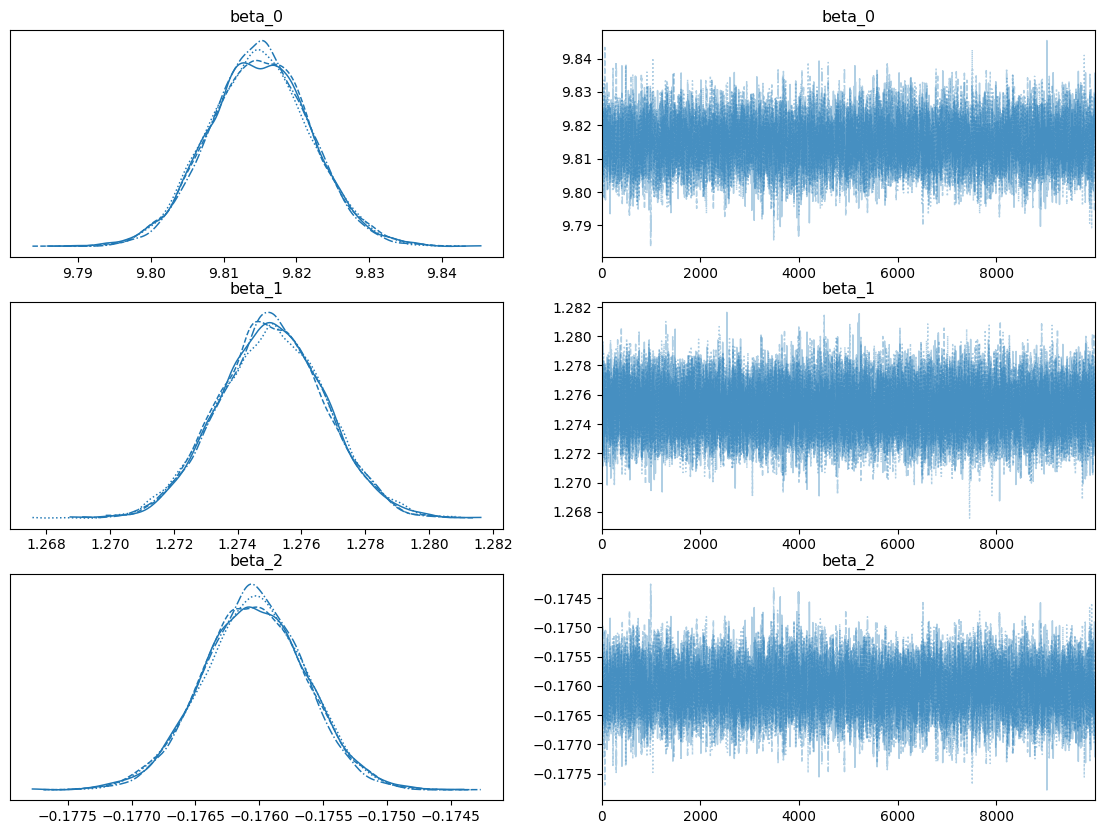

In [13]:
az.plot_trace(idata, figsize=(14, 10))  # サイズを調整
az.summary(idata)

In [8]:
posterior_samples = idata.posterior

beta_1_samples = posterior_samples['beta_1']

# 0以上のサンプルの割合を計算
prob_beta_1_positive = np.mean(beta_1_samples >= 0)

print(f"P(beta_1 >= 0) = {prob_beta_1_positive:.4f}")

P(beta_1 >= 0) = 1.0000
